## Drude media

In [27]:
%pylab inline --no-import-all
from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

t = Symbol('t')
tau, m, e = symbols('\\tau m e')
omega = Symbol('\\omega')

p = Function('p')(t)
E = Function('E')(t)
p_tilde = Symbol('\\tilde{p}')
E_tilde = Symbol('\\tilde{E}')


LHS = diff(p, t) + p/tau
RHS = e*E

print('equation of motion: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

LHS = (LHS.subs(p, p_tilde*exp(I*omega*t)).doit()/exp(I*omega*t)).simplify()
RHS = (RHS.subs(E, E_tilde*exp(I*omega*t)).doit()/exp(I*omega*t)).simplify()
print('Harmonic equation: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

EOM = LHS - RHS
p_tilde_rep = solve(EOM, p_tilde)[0]
print('solution: ')
display(Math(latex(p_tilde) + ' = ' + latex(p_tilde_rep)))

n_e =Symbol('n_e')
J_tilde = e*n_e*p_tilde_rep/m
print('current: ')
display(Math('\\tilde{J} = ' + latex(J_tilde)))

sigma = J_tilde/E_tilde
print('conductivity: ')
display(Math('\\sigma = ' + latex(sigma)))

sigma_str = lambdastr(omega, sigma).replace('\\', '').replace('{', '').replace('}', '')
print('chi_str = \n', sigma_str)

sigma_str = Misc.replace_whole_word(sigma_str, 'I', '1j')
print('sigma_str = \n', sigma_str)


Populating the interactive namespace from numpy and matplotlib
equation of motion: 


Harmonic equation: 


solution: 


current: 


conductivity: 


chi_str = 
 lambda omega: (tau*e**2*n_e/(m*(I*omega*tau + 1)))
sigma_str = 
 lambda omega: (tau*e**2*n_e/(m*(1j*omega*tau + 1)))


## Drude Media + magnetic bias

In [119]:
%reload_ext autoreload
%autoreload

%pylab inline --no-import-all
from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc
import Electromagnetics.VectorCalculus as VC

t = Symbol('t')
tau, m, e = symbols('\\tau m e')
omega = Symbol('\\omega')

px = Function('p_x')(t)
py = Function('p_y')(t)
Ex = Function('E_x')(t)
Ey = Function('E_y')(t)
px_tilde = Symbol('\\tilde{p_x}')
py_tilde = Symbol('\\tilde{p_y}')
Ex_tilde = Symbol('\\tilde{E_x}')
Ey_tilde = Symbol('\\tilde{E_y}')
B0 = Symbol('B_0')


p = Matrix([px, py, 0]).T
E = Matrix([Ex, Ey, 0]).T
B = Matrix([0, 0, B0]).T
p_tilde = Matrix([px_tilde, py_tilde, 0]).T
E_tilde = Matrix([Ex_tilde, Ey_tilde, 0]).T


LHS = Misc.SymMatrixdiff(p, t) + p/tau
RHS = e*(E + VC.crossproduct(p/m, B))

print('equation of motion: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

harmonic = exp(I*omega*t)

EOM = LHS - RHS
EOM = Misc.SymMatrixSimplify(EOM.subs([(px, px_tilde*harmonic), (py, py_tilde*harmonic)]))
EOM = Misc.SymMatrixSimplify(EOM.subs([(Ex, Ex_tilde*harmonic), (Ey, Ey_tilde*harmonic)]))
EOM = Misc.SymMatrixSimplify(Misc.SymMatrixdoit(EOM)/harmonic)
print('Harmonic equation: ')
display(Math(latex(EOM) + ' = 0'))

b = -Matrix([EOM[i].subs([(px_tilde, 0), (py_tilde, 0)]) for i in range(EOM.cols)])
display(Math('b = ' + latex(b)))
EOM = EOM + b.T
#display(Math(latex(EOM) + ' = 0'))
A = Matrix([[EOM[i].subs([(px_tilde, 1), (py_tilde, 0)]) for i in range(EOM.cols)],
            [EOM[i].subs([(px_tilde, 0), (py_tilde, 1)]) for i in range(EOM.cols)]]).T
display(Math('A = ' + latex(A)))

b.row_del(2)
A.row_del(2)

omega_c = Symbol('\\omega_c')
omega_c_rep = e*B0/m
display(Math(latex(omega_c) + ' = ' + latex(omega_c_rep)))
A = A.subs(omega_c_rep, omega_c)

p_tilde = Misc.SymMatrixSimplify(A.inv()*b)
print('solution: ')
display(Math('\\tilde{p} = ' + latex(p_tilde)))

n_e =Symbol('n_e')
J_tilde = e*n_e*p_tilde/m
print('current: ')
display(Math('\\tilde{J} = ' + latex(J_tilde)))

J_tilde = J_tilde.T
sigma = Matrix([[J_tilde[i].subs([(Ex_tilde, 1), (Ey_tilde, 0)]) for i in range(J_tilde.cols)],
                [J_tilde[i].subs([(Ex_tilde, 0), (Ey_tilde, 1)]) for i in range(J_tilde.cols)]]).T
sigma = Misc.SymMatrixSimplify(sigma)
print('conductivity: ')
display(Math('\\sigma = ' + latex(sigma)))

sigma_0 = Symbol('\\sigma_0')
sigma_0_rep = e**2*n_e*tau/m
display(Math(latex(sigma_0) + ' = ' + latex(sigma_0_rep)))
sigma = sigma.subs(sigma_0_rep, sigma_0)
sigma = Misc.SymMatrixSimplify(sigma, frac=True)
display(Math('\\sigma = ' + latex(sigma)))


sigma_d_str = lambdastr(omega, sigma[1,1]).replace('\\', '').replace('{', '').replace('}', '')
print('sigma_d_str = \n', sigma_d_str)

sigma_d_str = Misc.replace_whole_word(sigma_d_str, 'I', '1j')
print('sigma_d_str = \n', sigma_d_str)

sigma_o_str = lambdastr(omega, sigma[0,1]).replace('\\', '').replace('{', '').replace('}', '')
print('sigma_o_str = \n', sigma_o_str)

sigma_str = Misc.replace_whole_word(sigma_d_str, 'I', '1j')
print('sigma_o_str = \n', sigma_o_str)


Populating the interactive namespace from numpy and matplotlib
equation of motion: 


Harmonic equation: 


solution: 


current: 


conductivity: 


sigma_d_str = 
 lambda omega: (sigma_0*(I*omega*tau + 1)/(-omega**2*tau**2 + 2*I*omega*tau + omega_c**2*tau**2 + 1))
sigma_d_str = 
 lambda omega: (sigma_0*(1j*omega*tau + 1)/(-omega**2*tau**2 + 2*1j*omega*tau + omega_c**2*tau**2 + 1))
sigma_o_str = 
 lambda omega: (omega_c*sigma_0*tau/(-omega**2*tau**2 + 2*I*omega*tau + omega_c**2*tau**2 + 1))
sigma_o_str = 
 lambda omega: (omega_c*sigma_0*tau/(-omega**2*tau**2 + 2*I*omega*tau + omega_c**2*tau**2 + 1))


## Lorentz media

In [3]:
%pylab inline --no-import-all
from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

t = Symbol('t')
tau, gamma, m, e, k = symbols('\\tau \\gamma m e k')
omega = Symbol('\\omega')

x = Function('x')(t)
E = Function('E')(t)
x_tilde = Symbol('\\tilde{x}')
E_tilde = Symbol('\\tilde{E}')


LHS = m*diff(x, t, 2) + m*gamma*diff(x, t) + k*x
RHS = e*E

print('equation of motion: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

LHS = (LHS.subs(x, x_tilde*exp(I*omega*t)).doit()/exp(I*omega*t)).simplify()
RHS = (RHS.subs(E, E_tilde*exp(I*omega*t)).doit()/exp(I*omega*t)).simplify()
print('Harmonic equation: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

EOM = LHS - RHS
x_tilde_rep = solve(EOM, x_tilde)[0]
print('solution: ')
display(Math(latex(x_tilde) + ' = ' + latex(x_tilde_rep)))

n_e =Symbol('n_e')
P_tilde = n_e*e*x_tilde_rep
print('polarization density: ')
display(Math('\\tilde{P} = ' + latex(P_tilde)))

omega_0 = Symbol('\\omega_0')
k_rep = m*omega_0**2
display(Math('k = ' + latex(k_rep)))
P_tilde = P_tilde.subs(k, k_rep).simplify()
display(Math('\\tilde{P} = ' + latex(P_tilde)))

chi = P_tilde/E_tilde
display(Math('\\chi = ' + latex(chi)))

chi_str = lambdastr(omega, chi).replace('\\', '').replace('{', '').replace('}', '')
print('chi_str = \n', chi_str)

chi_str = Misc.replace_whole_word(chi_str, 'I', '1j')
print('chi_str = \n', chi_str)

omega_p = Symbol('\\omega_p')
epsilon_0 = Symbol('\\epsilon_0')
chi = chi.subs(n_e*e**2/m, omega_p**2*epsilon_0)
display(Math('\\chi = ' + latex(chi)))

chi_str = lambdastr(omega, chi).replace('\\', '').replace('{', '').replace('}', '')
print('chi_str = \n', chi_str)

chi_str = Misc.replace_whole_word(chi_str, 'I', '1j')
print('chi_str = \n', chi_str)


Populating the interactive namespace from numpy and matplotlib
equation of motion: 


<IPython.core.display.Math object>

Harmonic equation: 


<IPython.core.display.Math object>

solution: 


<IPython.core.display.Math object>

polarization density: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

chi_str = 
 lambda omega: (e**2*n_e/(m*(I*gamma*omega - omega**2 + omega_0**2)))
chi_str = 
 lambda omega: (e**2*n_e/(m*(1j*gamma*omega - omega**2 + omega_0**2)))


<IPython.core.display.Math object>

chi_str = 
 lambda omega: (epsilon_0*omega_p**2/(I*gamma*omega - omega**2 + omega_0**2))
chi_str = 
 lambda omega: (epsilon_0*omega_p**2/(1j*gamma*omega - omega**2 + omega_0**2))


## Non-local Drude - Boltzmann

In [52]:
%pylab inline --no-import-all
from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

t, x, v, p, k = symbols('t x v p k')

tau, gamma, m, e, hbar = symbols('\\tau \\gamma m e hbar')
omega, q = symbols('\\omega q')

f = Function('f')(t,x,k)
f_0 = Function('f_{0}')(k)
E = Function('E')(t, x)

dims = 2    ## dimension
dg = 2     ## degeneracy

LHS = diff(f, t) + v*diff(f,x) + e*E/hbar*diff(f, k)
RHS = gamma*(f_0 - f)

print('equation of motion: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

f_tilde = Function('\\tilde{f}')(k)
E_tilde = Symbol('\\tilde{E}')
delta = Symbol('\\delta')
harmonic = exp(I*(omega*t - q*x))
EQ = LHS - RHS
EQ = EQ.subs([(E, delta*E_tilde*harmonic), (f, f_0 + delta*f_tilde*harmonic)]).doit().expand()
display(Math('EQ = ' + latex(EQ)))

EQ = (EQ.subs(delta**2, 0)/harmonic).simplify()
display(Math('EQ = ' + latex(EQ)))

EQ = EQ.subs(delta, 1).simplify()
display(Math('EQ = ' + latex(EQ)))

f_tilde_rep = solve(EQ, f_tilde)[0]
display(Math(latex(f_tilde) + ' = ' + latex(f_tilde_rep)))

J_tilde = 2*e*dg/(2*pi*hbar)**dims*Integral(v*f_tilde_rep, k)
display(Math('\\tilde{J} = ' + latex(J_tilde)))

J_tilde = J_tilde.subs(v, hbar*k/m).simplify()
display(Math('\\tilde{J} = ' + latex(J_tilde)))


Populating the interactive namespace from numpy and matplotlib
equation of motion: 


## Non-local Drude with magnetic bias

In [59]:
%pylab inline --no-import-all
from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc
import Electromagnetics.VectorCalculus as VC

t, x, y, z = symbols('t x y z')
vx, vy, vz = symbols('v_x v_y v_z')
px, py, pz = symbols('p_x p_y p_z') 
kx, ky, kz = symbols('k_x k_y k_z')

tau, gamma, m, e, hbar = symbols('\\tau \\gamma m e hbar')
omega, qx, qy, qz = symbols('\\omega q_x q_y q_z')

f = Function('f')(t,x,y,kx,ky)
f_0 = Function('f_{0}')(kx,ky)
Ex = Function('E_x')(t, x)
Ey = Function('E_y')(t, x)
B_0 = Symbol('B_0')

v_vec = Matrix([vx, vy, 0]).T
p_vec = Matrix([px, py, 0]).T
k_vec = Matrix([kx, ky, 0]).T
E_vec = Matrix([Ex, Ey, 0]).T
B0_vec = Matrix([0, 0, B_0]).T

dims = 2    ## dimension
dg = 2     ## degeneracy

LHS = diff(f, t) + VC.dotproduct(v_vec, VC.gradient_r(f)) + \
    VC.dotproduct(e*(E_vec+VC.crossproduct(v_vec, B0_vec))/hbar, VC.gradient_r(f, kx, ky, kz))
RHS = gamma*(f_0 - f)

print('equation of motion: ')
display(Math(latex(LHS) + ' = ' + latex(RHS)))

"""
f_tilde = Function('\\tilde{f}')(kx, ky)
Ex_tilde = Symbol('\\tilde{E_x}')
delta = Symbol('\\delta')
harmonic = exp(I*(omega*t - qx*x))
EQ = LHS - RHS
EQ = EQ.subs([(E_x, delta*Ex_tilde*harmonic), (f, f_0 + delta*f_tilde*harmonic)]).doit().expand()
display(Math('EQ = ' + latex(EQ)))

EQ = (EQ.subs(delta**2, 0)/harmonic).simplify()
display(Math('EQ = ' + latex(EQ)))

EQ = EQ.subs(delta, 1).simplify()
display(Math('EQ = ' + latex(EQ)))

f_tilde_rep = solve(EQ, f_tilde)[0]
display(Math(latex(f_tilde) + ' = ' + latex(f_tilde_rep)))

J_tilde = 2*e*dg/(2*pi*hbar)**dims*Integral(v*f_tilde_rep, k)
display(Math('\\tilde{J} = ' + latex(J_tilde)))

J_tilde = J_tilde.subs(v, hbar*k/m).simplify()
display(Math('\\tilde{J} = ' + latex(J_tilde)))
"""


Populating the interactive namespace from numpy and matplotlib
equation of motion: 


"\nf_tilde = Function('\\tilde{f}')(kx, ky)\nEx_tilde = Symbol('\\tilde{E_x}')\ndelta = Symbol('\\delta')\nharmonic = exp(I*(omega*t - qx*x))\nEQ = LHS - RHS\nEQ = EQ.subs([(E_x, delta*Ex_tilde*harmonic), (f, f_0 + delta*f_tilde*harmonic)]).doit().expand()\ndisplay(Math('EQ = ' + latex(EQ)))\n\nEQ = (EQ.subs(delta**2, 0)/harmonic).simplify()\ndisplay(Math('EQ = ' + latex(EQ)))\n\nEQ = EQ.subs(delta, 1).simplify()\ndisplay(Math('EQ = ' + latex(EQ)))\n\nf_tilde_rep = solve(EQ, f_tilde)[0]\ndisplay(Math(latex(f_tilde) + ' = ' + latex(f_tilde_rep)))\n\nJ_tilde = 2*e*dg/(2*pi*hbar)**dims*Integral(v*f_tilde_rep, k)\ndisplay(Math('\\tilde{J} = ' + latex(J_tilde)))\n\nJ_tilde = J_tilde.subs(v, hbar*k/m).simplify()\ndisplay(Math('\\tilde{J} = ' + latex(J_tilde)))\n"

### Drude numerical

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


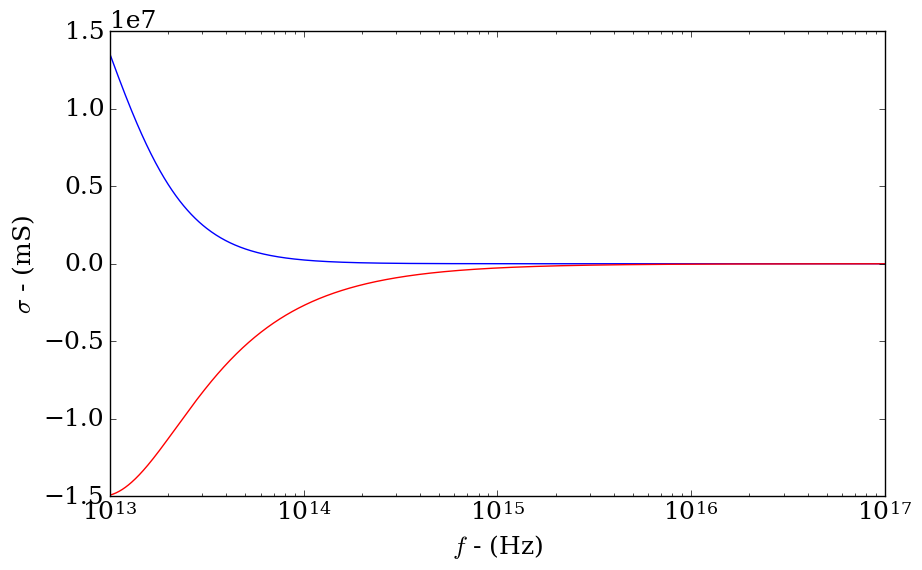

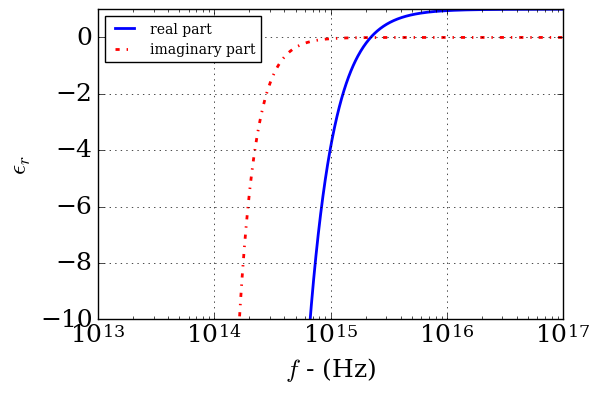

In [21]:
%reload_ext autoreload
%autoreload

%pylab inline

import numpy as np
from Electromagnetics.Causality import *
from scipy import constants
import math

f_0 = 10.0*constants.tera
f_1 = 100.0*constants.peta
N = 1000

f = np.logspace(np.log10(f_0), np.log10(f_1), N)

tau = 1.0/5.7e13 #0.1*constants.pico

mat_drude = DrudeModel(tau=tau, sigma_0=3.0e7)

omega = 2.0*math.pi*f
sigma = mat_drude.GetConductivity(omega)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

figsize(10, 6)

plot(f, np.real(sigma), 'b', f, np.imag(sigma), 'r')
xscale('log')

xlabel('$f$ - (Hz)', fontsize=18)
ylabel('$\\sigma$ - (mS)', fontsize=18)
show()

figsize(6, 4)
eps_r = 1.0 - 1j*sigma/(omega*constants.epsilon_0)
plot(f, np.real(eps_r), 'b', lw=2, label='real part')
plot(f, np.imag(eps_r), 'r-.', lw=2, label='imaginary part')
xscale('log')
xlabel('$f$ - (Hz)', fontsize=18)
ylabel('$\\epsilon_r$', fontsize=18)
ylim([-10, 1])
grid()
legend(loc='best', fontsize=10)
savefig('other/eps-metal.eps', bbox_inches='tight', pad_inches=0.2)
show()



### Lorentz numerical

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


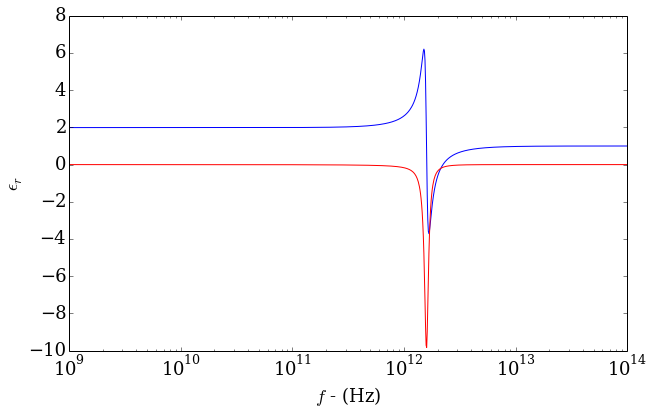

In [28]:
%reload_ext autoreload
%autoreload

%pylab inline

import numpy as np
from Electromagnetics.Causality import *
from scipy import constants
import math

f_0 = 1.0*constants.giga
f_1 = 100.0*constants.tera
N = 1000

f = np.logspace(np.log10(f_0), np.log10(f_1), N)

gamma = 1.0*constants.tera
omega_0 = 10.0*constants.tera

mat_lorentz = LorentzModel(gamma=gamma, omega_0=omega_0, chi_0=0.99)

omega = 2.0*math.pi*f
eps = mat_lorentz.GetPermittivity(omega)

figsize(10, 6)

plot(f, np.real(eps), 'b', f, np.imag(eps), 'r')
xscale('log')

xlabel('$f$ - (Hz)', fontsize=18)
ylabel('$\\epsilon_r$', fontsize=18)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)
